# IMAGE CLASSIFIER USING CNN (Mucca and Pecora Predictor) : - By Puneet Tiwari

In [1]:
#Importing Required modules here
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

# Task 1 & 2 : Loading Data and Pre-processing

In [2]:
#read csv training data using pandas

labels = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv")
labels.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [3]:
#checking columns
labels.columns

Index(['filename', 'animal_type'], dtype='object')

In [4]:
#encoding animal_type column into numeric value

animal_type = {'mucca': 1,'pecora': 0}

In [5]:
labels.animal_type = [animal_type[item] for item in labels.animal_type] 

In [6]:
labels.head()

,filename,animal_type
0,Image_1.jpg,1
1,Image_2.jpg,1
2,Image_3.jpg,1
3,Image_4.jpg,1
4,Image_5.jpg,1


In [7]:
#labelling the train data with given labels in the form of csv file and convert them into np.array
#store them into X

train_image = []
for i in tqdm(range(labels.shape[0])):
    img = image.load_img('train_beg/'+labels['filename'][i],target_size=(200,300,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1200/1200 [00:02<00:00, 556.49it/s]


In [8]:
#shape of the images
X.shape

(1200, 200, 300, 3)

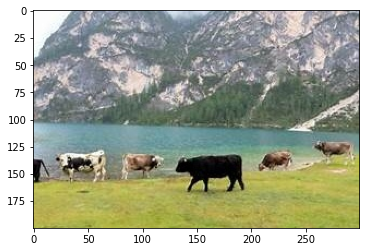

In [9]:
#checking image successfully loaded or not
plt.imshow(X[1])

In [10]:
#Now, storing target variable into y variable
y = np.array(labels.drop(['filename'],axis=1))
y.shape

(1200, 1)

# Task 3 : Multi-Layer Perceptron

In [11]:
#splitting the data (using train_test_split function)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [22]:
#Now we create neural network using convolutional layer, MaxPooling2D, Dropout, Flatten, and Dense layer

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(200,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [23]:
#checking model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 99, 149, 16)       0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 73, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 46, 71, 64)       

# Task 4 : Loss Function and Optimizer

In [24]:
#compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Task 5 : Training the model

In [26]:
#model fitting

final = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/200
108/108 [==============================] - 42s 388ms/step - loss: 0.6955 - accuracy: 0.4861 - val_loss: 0.6940 - val_accuracy: 0.4167
Epoch 2/200
108/108 [==============================] - 37s 347ms/step - loss: 0.6945 - accuracy: 0.4963 - val_loss: 0.6956 - val_accuracy: 0.4167
Epoch 3/200
108/108 [==============================] - 38s 353ms/step - loss: 0.6938 - accuracy: 0.4963 - val_loss: 0.6945 - val_accuracy: 0.4167
Epoch 4/200
108/108 [==============================] - 38s 352ms/step - loss: 0.6936 - accuracy: 0.4917 - val_loss: 0.6946 - val_accuracy: 0.4167
Epoch 5/200
108/108 [==============================] - 38s 355ms/step - loss: 0.6936 - accuracy: 0.5093 - val_loss: 0.6988 - val_accuracy: 0.4167
Epoch 6/200
108/108 [==============================] - 38s 352ms/step - loss: 0.6939 - accuracy: 0.5037 - val_loss: 0.6926 - val_accuracy: 0.5833
Epoch 7/200
108/108 [==============================] - 39s 359ms/step - loss: 0.6953 - accuracy: 0.4787 - val_loss: 0.6976 -

Epoch 57/200
108/108 [==============================] - 40s 369ms/step - loss: 0.4305 - accuracy: 0.7898 - val_loss: 0.5222 - val_accuracy: 0.7417
Epoch 58/200
108/108 [==============================] - 40s 369ms/step - loss: 0.4406 - accuracy: 0.7944 - val_loss: 0.5147 - val_accuracy: 0.7750
Epoch 59/200
108/108 [==============================] - 40s 370ms/step - loss: 0.4393 - accuracy: 0.7991 - val_loss: 0.5547 - val_accuracy: 0.7250
Epoch 60/200
108/108 [==============================] - 40s 367ms/step - loss: 0.4073 - accuracy: 0.8157 - val_loss: 0.4986 - val_accuracy: 0.7583
Epoch 61/200
108/108 [==============================] - 40s 372ms/step - loss: 0.4077 - accuracy: 0.8296 - val_loss: 0.5612 - val_accuracy: 0.7083
Epoch 62/200
108/108 [==============================] - 40s 369ms/step - loss: 0.4074 - accuracy: 0.8167 - val_loss: 0.5447 - val_accuracy: 0.7167
Epoch 63/200
108/108 [==============================] - 40s 369ms/step - loss: 0.3883 - accuracy: 0.8306 - val_loss: 0

108/108 [==============================] - 40s 368ms/step - loss: 0.1129 - accuracy: 0.9620 - val_loss: 0.8378 - val_accuracy: 0.7167
Epoch 168/200
108/108 [==============================] - 40s 370ms/step - loss: 0.0959 - accuracy: 0.9704 - val_loss: 0.8740 - val_accuracy: 0.7167
Epoch 169/200
108/108 [==============================] - 40s 368ms/step - loss: 0.0921 - accuracy: 0.9713 - val_loss: 0.7935 - val_accuracy: 0.7583
Epoch 170/200
108/108 [==============================] - 40s 372ms/step - loss: 0.0899 - accuracy: 0.9722 - val_loss: 0.7104 - val_accuracy: 0.7333
Epoch 171/200
108/108 [==============================] - 40s 368ms/step - loss: 0.1031 - accuracy: 0.9667 - val_loss: 1.1315 - val_accuracy: 0.7083
Epoch 172/200
108/108 [==============================] - 40s 369ms/step - loss: 0.0935 - accuracy: 0.9685 - val_loss: 0.8515 - val_accuracy: 0.7417
Epoch 173/200
108/108 [==============================] - 40s 369ms/step - loss: 0.0734 - accuracy: 0.9667 - val_loss: 1.1607 -

In [29]:
#Now save our model weights
model.save_weights('myfw.h5')

### Some basic visualization to understand accuracy and loss :

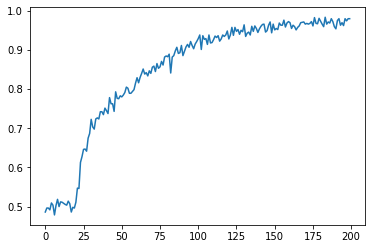

In [31]:
plt.plot(final.history['accuracy'])

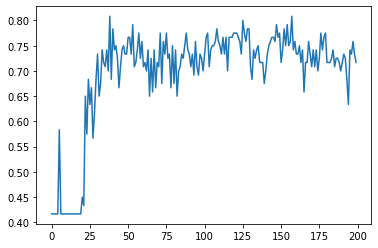

In [32]:
plt.plot(final.history['val_accuracy'])

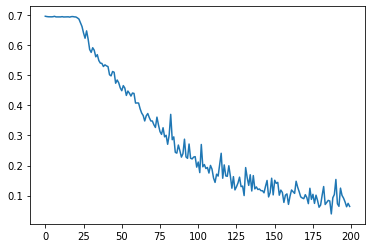

In [33]:
plt.plot(final.history['loss'])

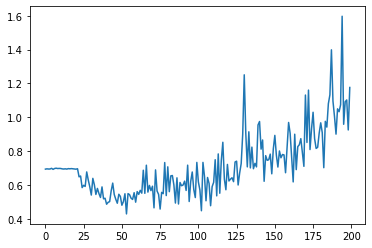

In [34]:
plt.plot(final.history['val_loss'])

# Final Task : Prediction 

In [64]:
img = image.load_img('test_beg/test_img/Image_14.jpg',target_size=(200,300,3))
img = image.img_to_array(img)
img = img/255

In [65]:
classes = np.array(labels.columns[1:])
proba = model.predict(img.reshape(1,200,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

animal_type (0.822)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [66]:
test_data=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv", header=None)

In [67]:
test_data.head()

,0
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [69]:
test_image = []
for i in tqdm(range(test_data.shape[0])):
    img = image.load_img('test_beg/test_img/'+labels['filename'][i],target_size=(200,300,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X = np.array(test_image)

100%|██████████| 400/400 [00:01<00:00, 313.14it/s]


In [72]:
result = model.predict(X)

In [73]:
result

array([[9.86143708e-01],
       [1.00263953e-03],
       [1.00000000e+00],
       [3.70399296e-01],
       [1.16339969e-07],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.54926014e-04],
       [9.97087598e-01],
       [3.75926495e-04],
       [9.89651859e-01],
       [1.37048960e-03],
       [4.31449444e-05],
       [8.22168708e-01],
       [1.95419670e-11],
       [4.44135070e-03],
       [1.00000000e+00],
       [3.81347537e-03],
       [1.42961740e-03],
       [1.45047903e-04],
       [3.32018435e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.27578187e-03],
       [1.20815635e-03],
       [1.29857719e-01],
       [9.97367680e-01],
       [3.74595329e-05],
       [9.99766231e-01],
       [3.65716338e-01],
       [1.73547864e-03],
       [1.04547826e-06],
       [1.06633379e-07],
       [9.75098729e-01],
       [7.48726130e-02],
       [9.60230350e-01],
       [9.51528549e-04],
       [9.99279678e-01],
       [8.72105360e-04],
       [4.21255291e-01],


In [74]:
list_result = result.tolist()

In [75]:
list_result

[[0.9861437082290649],
 [0.0010026395320892334],
 [1.0],
 [0.3703992962837219],
 [1.1633996876980746e-07],
 [1.0],
 [1.0],
 [0.0009549260139465332],
 [0.9970875978469849],
 [0.00037592649459838867],
 [0.9896518588066101],
 [0.0013704895973205566],
 [4.314494435675442e-05],
 [0.8221687078475952],
 [1.954196700293398e-11],
 [0.004441350698471069],
 [1.0],
 [0.0038134753704071045],
 [0.0014296174049377441],
 [0.00014504790306091309],
 [0.03320184350013733],
 [1.0],
 [1.0],
 [0.0032757818698883057],
 [0.0012081563472747803],
 [0.12985771894454956],
 [0.9973676800727844],
 [3.7459532904904336e-05],
 [0.9997662305831909],
 [0.3657163381576538],
 [0.0017354786396026611],
 [1.0454782568558585e-06],
 [1.0663337945970852e-07],
 [0.975098729133606],
 [0.07487261295318604],
 [0.9602303504943848],
 [0.0009515285491943359],
 [0.9992796778678894],
 [0.0008721053600311279],
 [0.42125529050827026],
 [0.9956105351448059],
 [0.9999980926513672],
 [2.1093225561291026e-18],
 [0.18551459908485413],
 [0.9638

In [77]:
from itertools import chain
f1 = list(chain.from_iterable(list_result))

In [78]:
f1

[0.9861437082290649,
 0.0010026395320892334,
 1.0,
 0.3703992962837219,
 1.1633996876980746e-07,
 1.0,
 1.0,
 0.0009549260139465332,
 0.9970875978469849,
 0.00037592649459838867,
 0.9896518588066101,
 0.0013704895973205566,
 4.314494435675442e-05,
 0.8221687078475952,
 1.954196700293398e-11,
 0.004441350698471069,
 1.0,
 0.0038134753704071045,
 0.0014296174049377441,
 0.00014504790306091309,
 0.03320184350013733,
 1.0,
 1.0,
 0.0032757818698883057,
 0.0012081563472747803,
 0.12985771894454956,
 0.9973676800727844,
 3.7459532904904336e-05,
 0.9997662305831909,
 0.3657163381576538,
 0.0017354786396026611,
 1.0454782568558585e-06,
 1.0663337945970852e-07,
 0.975098729133606,
 0.07487261295318604,
 0.9602303504943848,
 0.0009515285491943359,
 0.9992796778678894,
 0.0008721053600311279,
 0.42125529050827026,
 0.9956105351448059,
 0.9999980926513672,
 2.1093225561291026e-18,
 0.18551459908485413,
 0.9638050198554993,
 0.24351376295089722,
 0.000258028507232666,
 0.006432861089706421,
 0.0014

In [80]:
f2 = [round(x) for x in f1]
for n, i in enumerate(f2):
  if i==1:
    f2[n] = 'mucca'
  else:
    f2[n] = 'pecora' 

## FINALLY WE GET THE OUTPUT :

In [88]:
f2

['mucca',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',
 'mucca',
 'pecora',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'mucca',

# ---------------------------THANK YOU-----------------------------------